In [2]:
# !pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 22.3 MB/s 


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/P_study_Code/my_code/cats_dogs

In [99]:
cat_dir = '/content/drive/MyDrive/Colab Notebooks/P_study_Code/my_code/cats_dogs/cats/'
dog_dir = '/content/drive/MyDrive/Colab Notebooks/P_study_Code/my_code/cats_dogs/dogs/'

In [100]:
from glob import glob

cats = sorted(glob(cat_dir+'*'))
dogs = sorted(glob(dog_dir+'*'))

In [102]:
import pandas as pd 

df_cat = pd.DataFrame(cats,columns=['images'])
df_cat['label'] = 0
df_cat.head()

,images,label
0,/content/drive/MyDrive/Colab Notebooks/P_study...,0
1,/content/drive/MyDrive/Colab Notebooks/P_study...,0
2,/content/drive/MyDrive/Colab Notebooks/P_study...,0
3,/content/drive/MyDrive/Colab Notebooks/P_study...,0
4,/content/drive/MyDrive/Colab Notebooks/P_study...,0


In [103]:
from sklearn.utils import shuffle

In [104]:
df_dog = pd.DataFrame(dogs,columns=['images'])
df_dog['label']=1
df_dog.head()

,images,label
0,/content/drive/MyDrive/Colab Notebooks/P_study...,1
1,/content/drive/MyDrive/Colab Notebooks/P_study...,1
2,/content/drive/MyDrive/Colab Notebooks/P_study...,1
3,/content/drive/MyDrive/Colab Notebooks/P_study...,1
4,/content/drive/MyDrive/Colab Notebooks/P_study...,1


In [105]:
df_dog = pd.DataFrame(dogs,columns=['images'])
df_dog['label']=1
df = pd.concat([df_cat,df_dog],axis=0)
df = shuffle(df)
df.head()

,images,label
136,/content/drive/MyDrive/Colab Notebooks/P_study...,1
852,/content/drive/MyDrive/Colab Notebooks/P_study...,0
938,/content/drive/MyDrive/Colab Notebooks/P_study...,1
467,/content/drive/MyDrive/Colab Notebooks/P_study...,1
667,/content/drive/MyDrive/Colab Notebooks/P_study...,0


In [76]:
Image.open(df['images'][0]).convert('RGB').size

(300, 280)

In [116]:
x = list(df['images'].values)
y = list(df['label'].values)
len(x),len(y)

(2000, 2000)

In [21]:
# path = x[0]
# path

'/content/drive/MyDrive/Colab Notebooks/P_study_Code/my_code/cats_dogs/cats/cat.1.jpg'

In [26]:
import os
from PIL import Image

In [27]:
# # 임의의 labeling
# path = x[0]
# path_base = os.path.basename(path) # 가장 최하위 파일 경로명을 return
# print('path_base : ',path_base)
# label = path_base[:3]
# print('label : ',label) # Label 추출

path_base :  cat.1.jpg
label :  cat


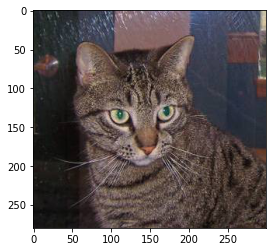

In [28]:
# path = x[0]
# image_pil = Image.open(path)
# image = np.array(image_pil)
# plt.imshow(image)

In [108]:
# def make_image(path):
#     image_pil = Image.open(path).convert('RGB')
#     image_pil = image_pil.resize((224,224)) #위의 data 경우에는 이미지 크기가 다 다르므로 28,28 사이즈로 통일해주었습니다. 이는 원하시는대로 바꾸시면 됩니다
#     image = np.array(image_pil)
#     return image

In [109]:
# def get_label(path):
#     path_base = os.path.basename(path)
#     label = path_base[:3]
#     return label

In [72]:
# temp_path = x[5]
# image_temp = make_image(temp_path)
# label_temp = get_label(temp_path)

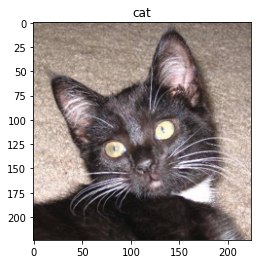

In [32]:
# plt.imshow(image_temp)
# plt.title(label_temp)
# plt.show()

In [33]:
# image_temp.shape

(224, 224, 3)

In [34]:
from tqdm import tqdm

In [35]:
# path

'/content/drive/MyDrive/Colab Notebooks/P_study_Code/my_code/cats_dogs/cats/cat.1.jpg'

In [115]:
# y[0]

IndexError: ignored

In [122]:
X = []
label = []

for img, l in tqdm(zip(x,y)):
  img = Image.open(img).convert('RGB')
  img = img.resize((224,224))
  img_arr = np.asarray(img)
  X.append(img_arr)
  label.append(l)

2000it [00:12, 163.16it/s]


In [124]:
X[0].shape, y[0]

((224, 224, 3), 1)

In [125]:
# 행렬로 변환
X = np.array(X)
X.shape

(2000, 224, 224, 3)

In [81]:
from tensorflow.keras.utils import to_categorical

In [126]:
y_one_hot = to_categorical(y)
y_one_hot[1]

array([1., 0.], dtype=float32)

In [127]:
y_one_hot.shape

(2000, 2)

In [66]:
y[0]

array([0])

In [128]:
num_classes = 2
input_shape = (224, 224, 3)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_one_hot,stratify=y,test_size=0.2,random_state=42)

In [129]:
print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}") 
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (1600, 224, 224, 3) - y_train shape: (1600, 2)
x_test shape: (400, 224, 224, 3) - y_test shape: (400, 2)


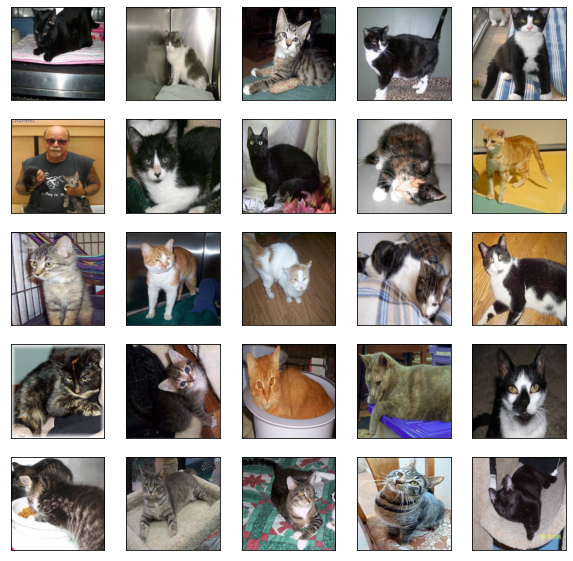

In [44]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.show()

# 모델

# Configure the hyperparameters

In [158]:
learning_rate = 0.001
batch_size = 16
num_epochs = 40
validation_split = 0.1
weight_decay = 0.0001
label_smoothing = 0.1

patch_size = (16, 16)  # 2-by-2 sized patches
dropout_rate = 0.03  # Dropout rate
num_heads = 8  # Attention heads
embed_dim = 16  # Embedding dimension
num_mlp = 256  # MLP layer size
qkv_bias = True  # Convert embedded patches to query, key, and values with a learnable additive value
window_size = 2  # Size of attention window
shift_size = 1  # Size of shifting window
image_dimension = 224  # Initial image size

num_patch_x = input_shape[0] // patch_size[0]
num_patch_y = input_shape[1] // patch_size[1]

# Helper functions

In [132]:
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        x, shape=(-1, patch_num_y, window_size, patch_num_x, window_size, channels)
    )
    x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, shape=(-1, window_size, window_size, channels))
    return windows


def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        windows,
        shape=(-1, patch_num_y, patch_num_x, window_size, window_size, channels),
    )
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, shape=(-1, height, width, channels))
    return x


class DropPath(layers.Layer):
    def __init__(self, drop_prob=None, **kwargs):
        super(DropPath, self).__init__(**kwargs)
        self.drop_prob = drop_prob

    def call(self, x):
        input_shape = tf.shape(x)
        batch_size = input_shape[0]
        rank = x.shape.rank
        shape = (batch_size,) + (1,) * (rank - 1)
        random_tensor = (1 - self.drop_prob) + tf.random.uniform(shape, dtype=x.dtype)
        path_mask = tf.floor(random_tensor)
        output = tf.math.divide(x, 1 - self.drop_prob) * path_mask
        return output


# Window based multi-head self-attention

In [133]:

class WindowAttention(layers.Layer):
    def __init__(
        self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs
    ):
        super(WindowAttention, self).__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)

    def build(self, input_shape):
        num_window_elements = (2 * self.window_size[0] - 1) * (
            2 * self.window_size[1] - 1
        )
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=tf.initializers.Zeros(),
            trainable=True,
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords_matrix = np.meshgrid(coords_h, coords_w, indexing="ij")
        coords = np.stack(coords_matrix)
        coords_flatten = coords.reshape(2, -1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.transpose([1, 2, 0])
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)

        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index), trainable=False
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k

        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(
            self.relative_position_index, shape=(-1,)
        )
        relative_position_bias = tf.gather(
            self.relative_position_bias_table, relative_position_index_flat
        )
        relative_position_bias = tf.reshape(
            relative_position_bias, shape=(num_window_elements, num_window_elements, -1)
        )
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)

        if mask is not None:
            nW = mask.get_shape()[0]
            mask_float = tf.cast(
                tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32
            )
            attn = (
                tf.reshape(attn, shape=(-1, nW, self.num_heads, size, size))
                + mask_float
            )
            attn = tf.reshape(attn, shape=(-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)

        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

# The complete Swin Transformer model

In [134]:

class SwinTransformer(layers.Layer):
    def __init__(
        self,
        dim,
        num_patch,
        num_heads,
        window_size=7,
        shift_size=0,
        num_mlp=1024,
        qkv_bias=True,
        dropout_rate=0.0,
        **kwargs,
    ):
        super(SwinTransformer, self).__init__(**kwargs)

        self.dim = dim  # number of input dimensions
        self.num_patch = num_patch  # number of embedded patches
        self.num_heads = num_heads  # number of attention heads
        self.window_size = window_size  # size of window
        self.shift_size = shift_size  # size of window shift
        self.num_mlp = num_mlp  # number of MLP nodes

        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = DropPath(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        self.mlp = keras.Sequential(
            [
                layers.Dense(num_mlp),
                layers.Activation(keras.activations.gelu),
                layers.Dropout(dropout_rate),
                layers.Dense(dim),
                layers.Dropout(dropout_rate),
            ]
        )

        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            w_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)

            # mask array to windows
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(
                mask_windows, shape=[-1, self.window_size * self.window_size]
            )
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(
                mask_windows, axis=2
            )
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(initial_value=attn_mask, trainable=False)

    def call(self, x):
        height, width = self.num_patch
        _, num_patches_before, channels = x.shape
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, shape=(-1, height, width, channels))
        if self.shift_size > 0:
            shifted_x = tf.roll(
                x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2]
            )
        else:
            shifted_x = x

        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(
            x_windows, shape=(-1, self.window_size * self.window_size, channels)
        )
        attn_windows = self.attn(x_windows, mask=self.attn_mask)

        attn_windows = tf.reshape(
            attn_windows, shape=(-1, self.window_size, self.window_size, channels)
        )
        shifted_x = window_reverse(
            attn_windows, self.window_size, height, width, channels
        )
        if self.shift_size > 0:
            x = tf.roll(
                shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2]
            )
        else:
            x = shifted_x

        x = tf.reshape(x, shape=(-1, height * width, channels))
        x = self.drop_path(x)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = self.drop_path(x)
        x = x_skip + x
        return x


In [154]:

class PatchExtract(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(PatchExtract, self).__init__(**kwargs)
        self.patch_size_x = patch_size[0]
        self.patch_size_y = patch_size[0]

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=(1, self.patch_size_x, self.patch_size_y, 1),
            strides=(1, self.patch_size_x, self.patch_size_y, 1),
            rates=(1, 1, 1, 1),
            padding="SAME",
        )
        patch_dim = patches.shape[-1]
        patch_num = patches.shape[1]
        return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))


class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super(PatchEmbedding, self).__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)

    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch, delta=1)
        return self.proj(patch) + self.pos_embed(pos)


class PatchMerging(tf.keras.layers.Layer):
    def __init__(self, num_patch, embed_dim):
        super(PatchMerging, self).__init__()
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)

    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.get_shape().as_list()
        x = tf.reshape(x, shape=(-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat((x0, x1, x2, x3), axis=-1)
        x = tf.reshape(x, shape=(-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)


In [159]:
input = layers.Input(input_shape)
x = layers.RandomCrop(image_dimension, image_dimension)(input)
x = layers.RandomFlip("horizontal")(x)
x = PatchExtract(patch_size)(x)
x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)

In [160]:
input = layers.Input(input_shape)
x = layers.RandomCrop(image_dimension, image_dimension)(input)
x = layers.RandomFlip("horizontal")(x)
x = PatchExtract(patch_size)(x)
x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)
#x = PatchEmbedding(256, embed_dim)(x)

x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=0,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x)

x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=shift_size,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x)

x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(num_classes, activation="softmax")(x)

In [175]:
model = keras.Model(input, output)
model.compile(
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing),
    optimizer=tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    ),
    metrics=[
        keras.metrics.CategoricalAccuracy(name="accuracy"),
        keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=validation_split)

Epoch 1/40
90/90 [==============================] - 38s 38ms/step - loss: 0.9233 - accuracy: 0.5938 - top-5-accuracy: 1.0000 - val_loss: 0.7077 - val_accuracy: 0.5875 - val_top-5-accuracy: 1.0000
Epoch 2/40
90/90 [==============================] - 3s 29ms/step - loss: 0.7304 - accuracy: 0.5826 - top-5-accuracy: 1.0000 - val_loss: 0.7081 - val_accuracy: 0.5500 - val_top-5-accuracy: 1.0000
Epoch 3/40
90/90 [==============================] - 3s 28ms/step - loss: 0.7127 - accuracy: 0.6028 - top-5-accuracy: 1.0000 - val_loss: 0.7076 - val_accuracy: 0.5750 - val_top-5-accuracy: 1.0000
Epoch 4/40
90/90 [==============================] - 2s 22ms/step - loss: 0.7625 - accuracy: 0.5813 - top-5-accuracy: 1.0000 - val_loss: 0.7507 - val_accuracy: 0.5125 - val_top-5-accuracy: 1.0000
Epoch 5/40
90/90 [==============================] - 2s 22ms/step - loss: 0.9618 - accuracy: 0.5660 - top-5-accuracy: 1.0000 - val_loss: 0.7771 - val_accuracy: 0.5875 - val_top-5-accuracy: 1.0000
Epoch 6/40
90/90 [======

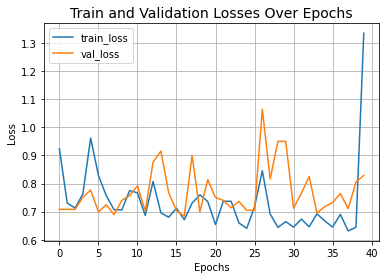

In [176]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [178]:
loss, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

13/13 [==============================] - 1s 15ms/step - loss: 0.7688 - accuracy: 0.5200 - top-5-accuracy: 1.0000
Test loss: 0.77
Test accuracy: 52.0%
Test top 5 accuracy: 100.0%
